# Ejercicio Seguimiento Semana 3 

## Dataset de lyfestyle and healt risk prediction 

### Autores: 


Jordan Esteban Ramirez Mejia

Juan Felipe Pinzon Trejo
 
David Gonzalez Idarraga


In [13]:
# Importacion de librerias iniciales
import pandas as pd
import os 
import numpy as np 
import matplotlib as plt




In [14]:
# Lectura del archivo 

file = 'dataset/Lifestyle_and_Health_Risk_Prediction_Synthetic_Dataset.csv'
df = pd.read_csv(file)

print(df.shape)
df.head


(5000, 12)


<bound method NDFrame.head of       age  weight  height exercise  sleep sugar_intake smoking alcohol  \
0      56      67     195      low    6.1       medium     yes     yes   
1      69      76     170     high    6.9         high      no      no   
2      46     106     153     high    6.6          low     yes      no   
3      32      54     186   medium    8.5       medium      no      no   
4      60      98     195     high    8.0          low      no      no   
...   ...     ...     ...      ...    ...          ...     ...     ...   
4995   42      75     187   medium    7.2          low      no      no   
4996   39      86     183      low    7.4          low      no      no   
4997   48      56     194     none    7.2         high     yes     yes   
4998   34     109     148   medium    9.9       medium      no      no   
4999   72      47     149     high    6.3       medium      no      no   

     married     profession   bmi health_risk  
0        yes  office_worker  17.6

Se procedera con la revisión de nulos

In [18]:
# Revisar tipo de datos 
print(df.dtypes) 

# Conteo de valores 

print("\n Resumen general por tipo de datos",  df.dtypes.value_counts())

# Revision de datos nulos

print("\n Revision de datos nulos: ", df.isna().sum().sort_values(ascending=False))


age               int64
weight            int64
height            int64
exercise         object
sleep           float64
sugar_intake     object
smoking          object
alcohol          object
married          object
profession       object
bmi             float64
health_risk      object
dtype: object

 Resumen general por tipo de datos object     7
int64      3
float64    2
Name: count, dtype: int64

 Revision de datos nulos:  age             0
weight          0
height          0
exercise        0
sleep           0
sugar_intake    0
smoking         0
alcohol         0
married         0
profession      0
bmi             0
health_risk     0
dtype: int64


Como hemos validado no hay nulos y el dataset contiene 5 columnas numericas y 7 categóricas

In [19]:
# Estadística descriptiva de variables numericas 

num_cols = ['age', 'weight', 'height', 'sleep', 'bmi']
df[num_cols].describe().T


,count,mean,std,min,25%,50%,75%,max
age,5000.0,48.80560,17.906991,18.0,34.0,49.0,64.0,79.0
weight,5000.0,77.35920,18.714567,45.0,61.0,77.0,94.0,109.0
height,5000.0,171.93320,15.822225,145.0,158.0,171.5,186.0,199.0
sleep,5000.0,6.99706,1.432849,3.0,6.0,7.0,8.0,10.0
bmi,5000.0,26.84388,8.252490,11.4,20.3,26.0,32.4,51.4


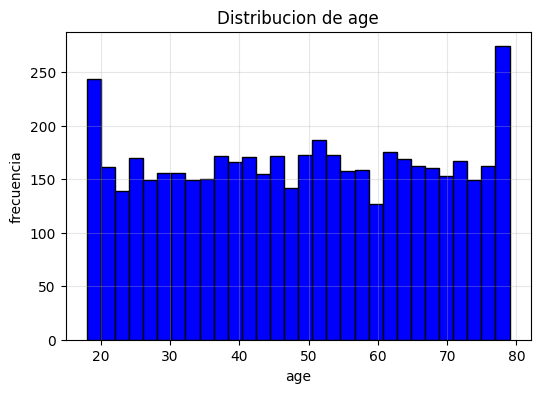

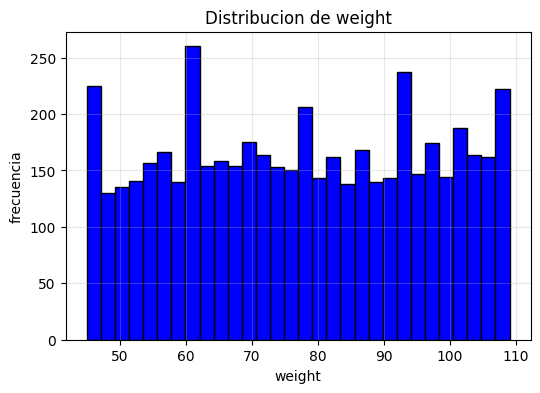

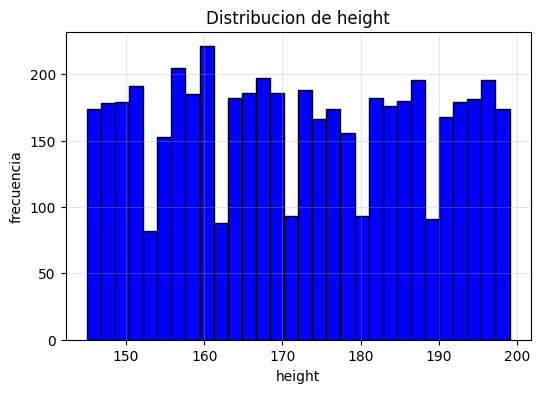

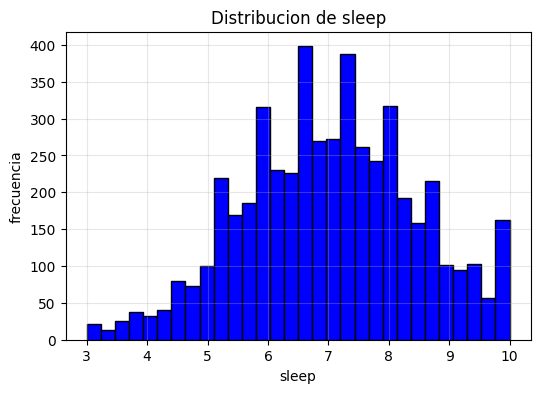

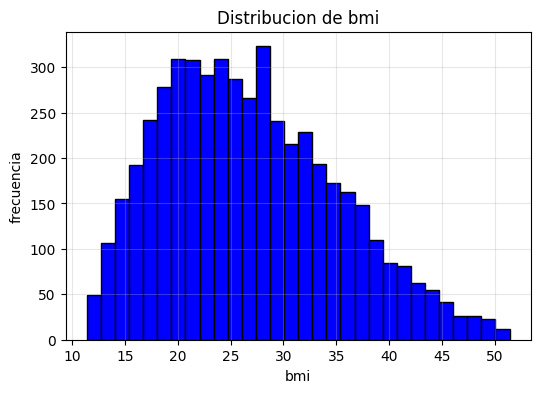

In [20]:
# Histograma para identificar la distribución
from matplotlib import pyplot as plt 

for col in num_cols:
    plt.figure(figsize=(6,4))
    plt.hist(df[col], bins=30, color='blue', edgecolor='black')
    plt.title(f"Distribucion de {col}")
    plt.xlabel(col)
    plt.ylabel("frecuencia")
    plt.grid(alpha=0.3)
    plt.show
    

### Conclusiones: 

La edad presente una distribución concentrada en adultos, son muy pocos casos en edades muy altas. 

Las alturas presentan una distribución uniforme con poca variabilidad extrema

El peso presenta un comportamiento uniforme, con leves variaciones 
 
Las horas de sueño denotan una aparente normalidad, sin mayor sesgo, con leves variaciones extremas en ciertas cantidades 
 
El índice de masa corporal presenta un sesgo a la derecha, 
con una gran mayoría de la población bajo un límite de "normalidad" según la tabla de IMC (18.5-24.9) y un residuo importante por fuera de este rango



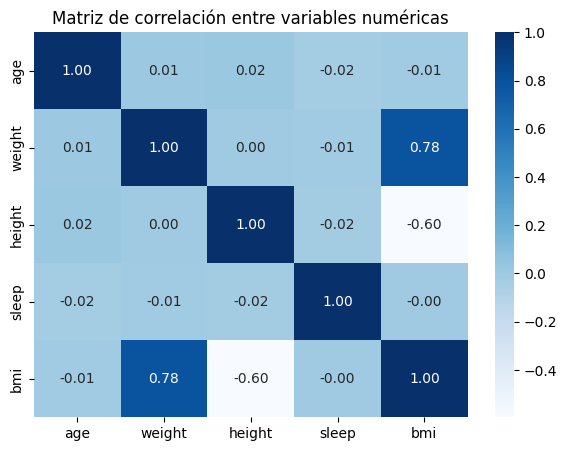

In [21]:
# Matriz de correlación entre numericas
import seaborn as sns

plt.figure(figsize=(7, 5))
sns.heatmap(df[num_cols].corr(), annot=True, cmap="Blues", fmt=".2f")
plt.title("Matriz de correlación entre variables numéricas")
plt.show()

### Conclusiones de correlación:

 
Frente a correlaciones numéricas encontramos que solo se presenta una alta relación entre el BMI con las variables altura y peso, lo cual tiene sentido, entendiendo que el propio BMI se calcula bajo la fórmula de (Peso/Altura)

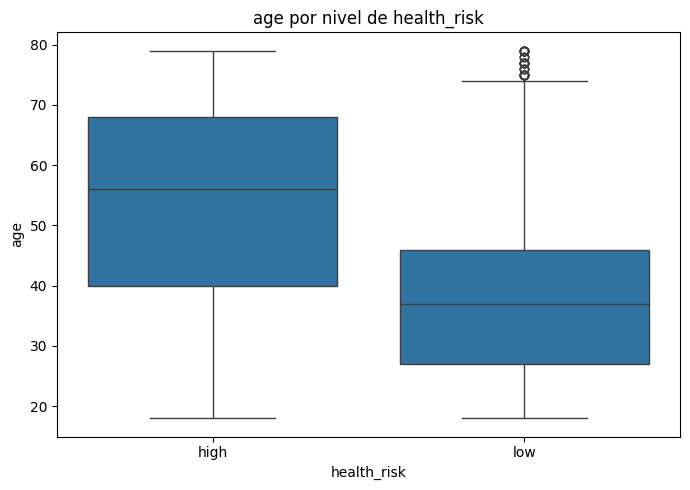

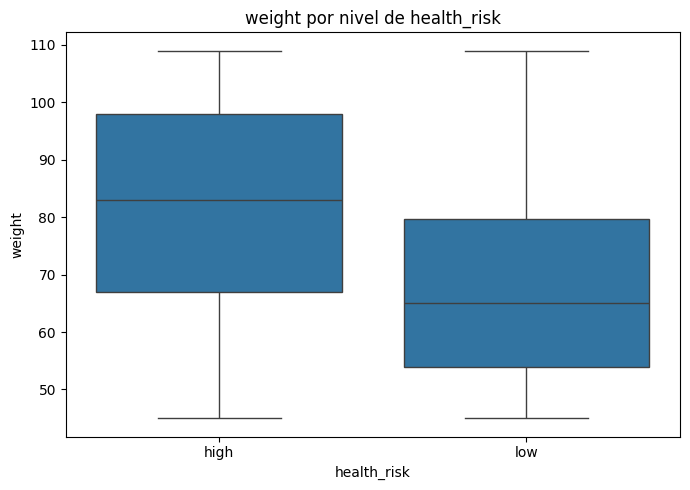

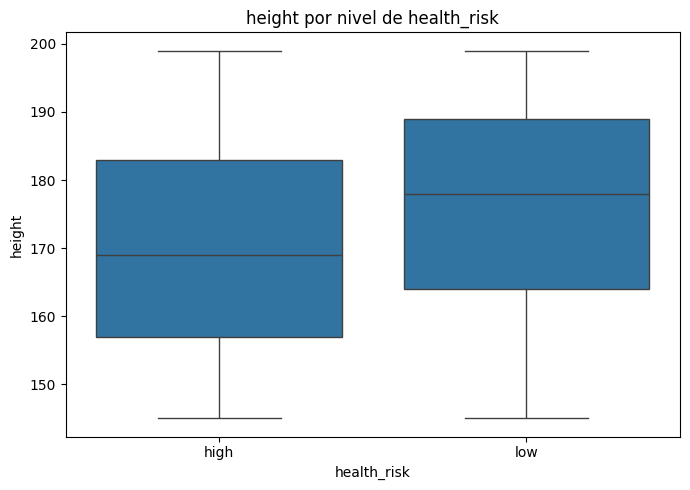

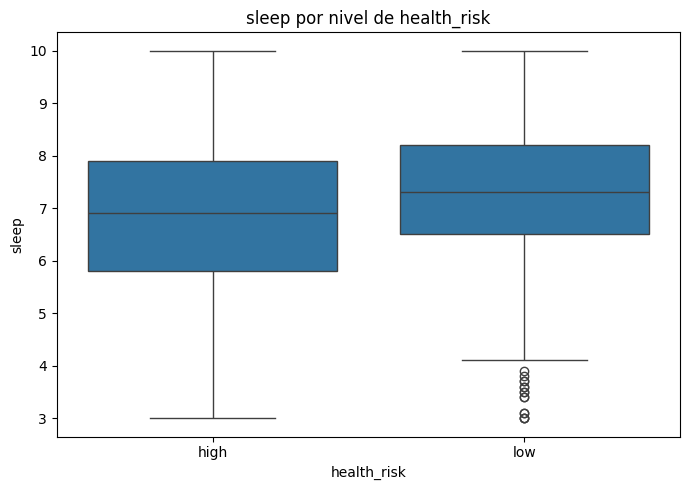

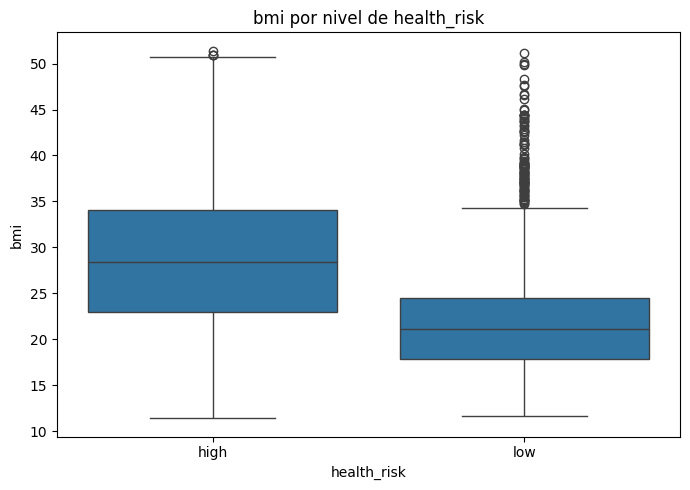

In [22]:
for col in num_cols:
    plt.figure(figsize=(7,5))
    sns.boxplot(x='health_risk', y=col, data=df)
    plt.title(f"{col} por nivel de health_risk")
    plt.xlabel("health_risk")
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()



# Conclusiones Boxplot



Despues del analisis inicial, `Es importante tener presente que el ejercicio inicial, se hizo para entender rápidamente los datos`  

procedemos a continuación con el script de pre-procesamiento automático el cual tiene como finalidad: 

1. `Procesar nulos` 

2. `Detectar tipos de datos.` 

3. `Mapear las categóricas cuando se necesite para los modelos.` 



In [31]:
def preprocess_basic(df: pd.DataFrame):
    df = df.copy()
    num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    cat_cols = df.select_dtypes(include=["object","category","bool"]).columns.tolist()

    # rellenar nulos
    for c in num_cols:
        if df[c].isna().any():
            df[c] = df[c].fillna(df[c].median())
    for c in cat_cols:
        s = df[c].astype(str).str.strip()
        s = s.mask(s.eq("") | s.eq("nan"), "Unknown")
        df[c] = s.fillna("Unknown")

    return df, num_cols, cat_cols

def one_hot_limited(df: pd.DataFrame, max_unique: int = 60):
    df = df.copy()
    cat_cols = df.select_dtypes(include=["object","category","bool"]).columns.tolist()
    to_dummy = [c for c in cat_cols if df[c].nunique() <= max_unique]
    df = pd.get_dummies(df, columns=to_dummy, dummy_na=False)
    # limpiar infinitos y nulos residuales
    df = df.replace([np.inf, -np.inf], np.nan).fillna(0)
    return df

,count,mean,std,min,25%,50%,75%,max
age,5000.0,48.80560,17.906991,18.0,34.0,49.0,64.0,79.0
weight,5000.0,77.35920,18.714567,45.0,61.0,77.0,94.0,109.0
height,5000.0,171.93320,15.822225,145.0,158.0,171.5,186.0,199.0
sleep,5000.0,6.99706,1.432849,3.0,6.0,7.0,8.0,10.0
bmi,5000.0,26.84388,8.252490,11.4,20.3,26.0,32.4,51.4


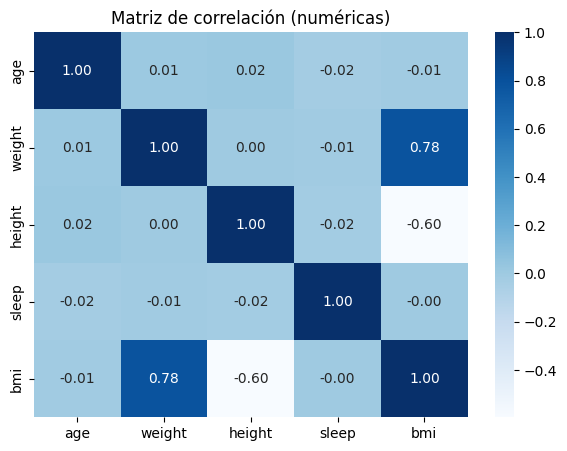

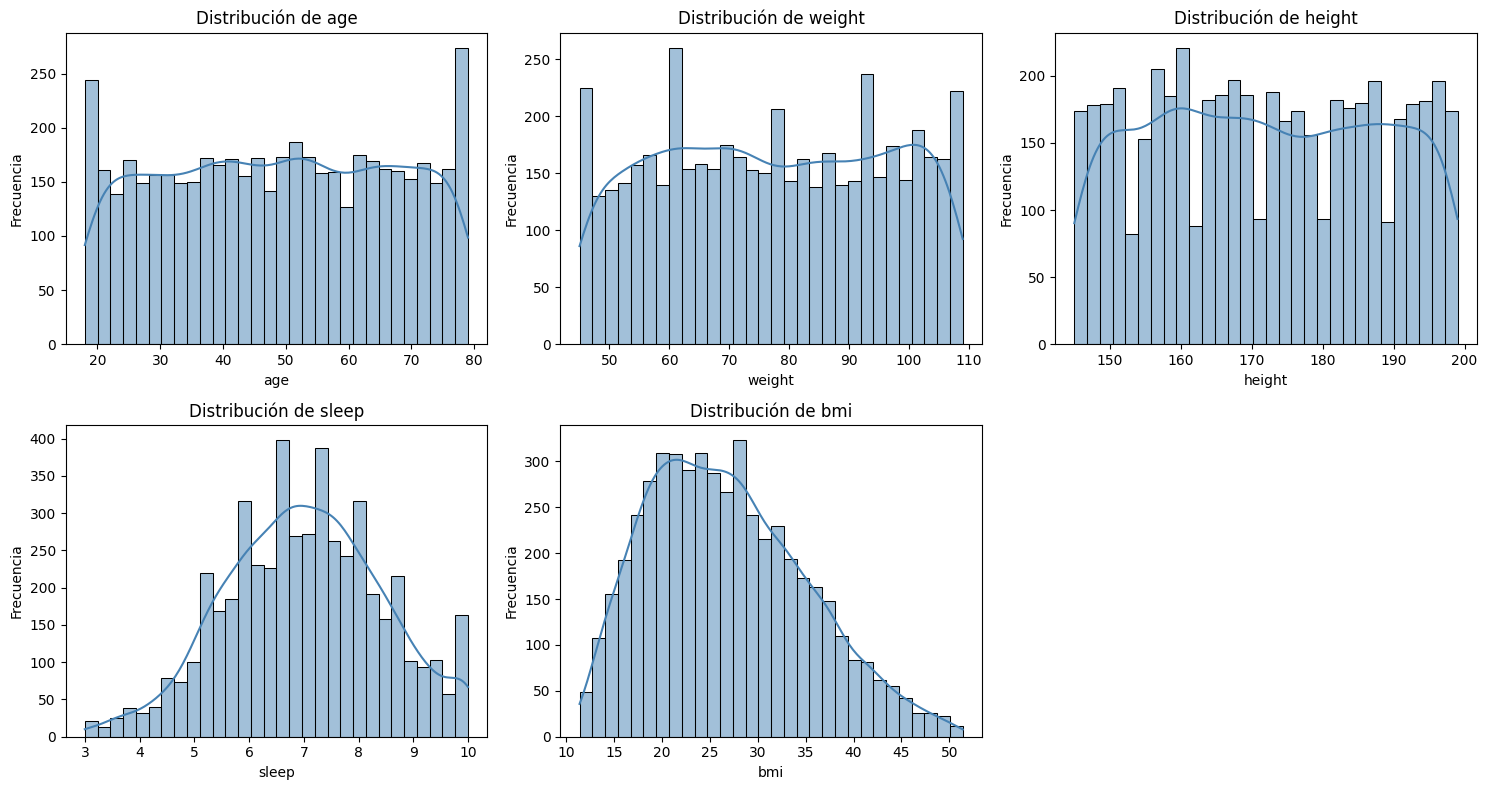

In [32]:
# EDA 
df_pp, num_cols, cat_cols = preprocess_basic(df)

# 2.1 Stats
display(df_pp[num_cols].describe().T)

# 2.2 Correlaciones
plt.figure(figsize=(7,5))
sns.heatmap(df_pp[num_cols].corr(), annot=True, cmap="Blues", fmt=".2f")
plt.title("Matriz de correlación (numéricas)")
plt.show()

# 2.3 Distribuciones
n_cols = 3
n_rows = int(np.ceil(len(num_cols)/n_cols)) or 1
plt.figure(figsize=(15, n_rows*4))
for i, col in enumerate(num_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(df_pp[col], kde=True, bins=30, color="steelblue")
    plt.title(f"Distribución de {col}")
    plt.xlabel(col); plt.ylabel("Frecuencia")
plt.tight_layout(); plt.show()




In [35]:
# Prophet  nivel de pronóstico sintético: 
import datetime as dt 

metric_col = "bmi" 
N_DAYS = 120
date_index = pd.date_range(end=dt.date.today(), periods=N_DAYS, freq="D")

# Asignamos a cada fila una fecha random del rango
rng = np.random.default_rng(42)
assigned_dates = rng.choice(date_index, size=len(df))
tmp = df.copy()
tmp["ds"] = pd.to_datetime(assigned_dates)

# Agregar por día el promedio de la métrica
daily = tmp.groupby("ds")[metric_col].mean().reset_index()
daily.rename(columns={metric_col: "y"}, inplace=True)

print("Primeras filas de la serie diaria agregada:")
display(daily.head())
print("Puntos diarios:", len(daily))


Primeras filas de la serie diaria agregada:


,ds,y
0,2025-07-06,26.553488
1,2025-07-07,26.356667
2,2025-07-08,27.514634
3,2025-07-09,25.232432
4,2025-07-10,25.521951


Puntos diarios: 120


15:28:37 - cmdstanpy - INFO - Chain [1] start processing
15:28:37 - cmdstanpy - INFO - Chain [1] done processing


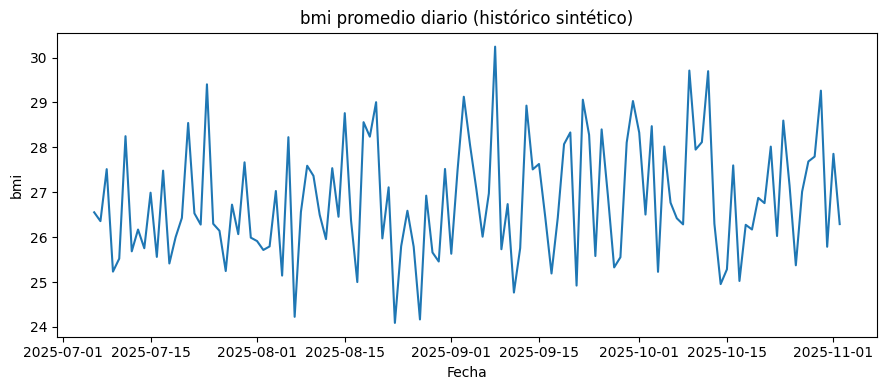

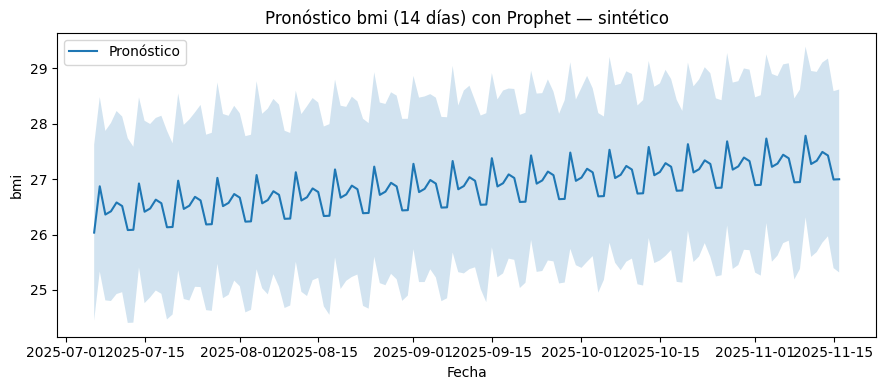

,ds,yhat,yhat_lower,yhat_upper
127,2025-11-10,27.784,26.311,29.392
128,2025-11-11,27.274,25.597,28.952
129,2025-11-12,27.333,25.685,28.937
130,2025-11-13,27.492,25.852,29.106
131,2025-11-14,27.427,25.969,29.177
132,2025-11-15,26.994,25.395,28.589
133,2025-11-16,26.999,25.317,28.618


In [36]:
# Entranemiento de prophet: 
from prophet import Prophet

# Prophet requiere columnas: ds (fecha) e y (valor)
m = Prophet(seasonality_mode='additive')
m.fit(daily)

future = m.make_future_dataframe(periods=14)  # 14 días a futuro
forecast = m.predict(future)

# Graficar histórico
plt.figure(figsize=(9,4))
plt.plot(daily["ds"], daily["y"])
plt.title(f"{metric_col} promedio diario (histórico sintético)")
plt.xlabel("Fecha"); plt.ylabel(metric_col)
plt.tight_layout(); plt.show()

# Graficar pronóstico con bandas
plt.figure(figsize=(9,4))
plt.plot(forecast["ds"], forecast["yhat"], label="Pronóstico")
plt.fill_between(forecast["ds"], forecast["yhat_lower"], forecast["yhat_upper"], alpha=0.2)
plt.title(f"Pronóstico {metric_col} (14 días) con Prophet — sintético")
plt.xlabel("Fecha"); plt.ylabel(metric_col)
plt.legend()
plt.tight_layout(); plt.show()

# Resumen rápido de los últimos días pronosticados
forecast.tail(7)[["ds","yhat","yhat_lower","yhat_upper"]].round(3)

In [37]:
# Insight simple: última observación vs. último pronóstico
last_obs = daily.sort_values("ds").iloc[-1]["y"]
last_fore = forecast.sort_values("ds").iloc[-1]["yhat"]
delta = last_fore - last_obs

trend = "al alza" if delta > 0 else "a la baja" if delta < 0 else "estable"
print(f"Último {metric_col} observado ≈ {last_obs:.2f}")
print(f"Pronóstico en 14 días ≈ {last_fore:.2f} → tendencia {trend} (Δ {delta:.2f})")



Último bmi observado ≈ 26.29
Pronóstico en 14 días ≈ 27.00 → tendencia al alza (Δ 0.71)


Modelo: CatBoost
ROC-AUC: 1.000

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       302
           1       1.00      1.00      1.00       698

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



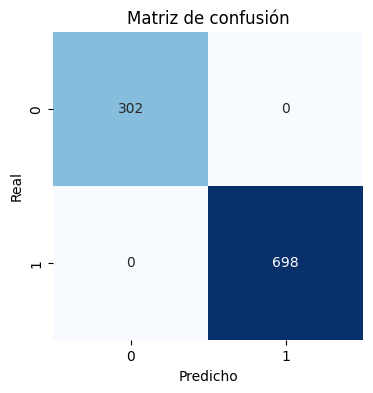

/var/folders/pq/jhcs0jvn49l9tv75b795vpw00000gn/T/ipykernel_11619/2967500706.py:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importancias, y=importancias.index, palette="viridis")


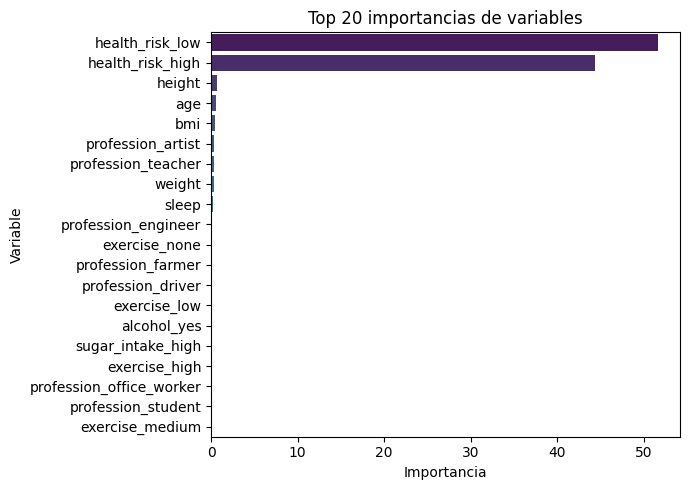

health_risk_low             51.627
health_risk_high            44.388
height                       0.633
age                          0.628
bmi                          0.498
profession_artist            0.340
profession_teacher           0.329
weight                       0.311
sleep                        0.261
profession_engineer          0.120
exercise_none                0.117
profession_farmer            0.095
profession_driver            0.081
exercise_low                 0.080
alcohol_yes                  0.078
sugar_intake_high            0.074
exercise_high                0.065
profession_office_worker     0.056
profession_student           0.049
exercise_medium              0.049
dtype: float64

In [39]:
#Clasificacion Catboost/LightGBM/xGBoost
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.ensemble import RandomForestClassifier, IsolationForest
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA

# Target binaria: 1 si health_risk contiene "High", 0 en otro caso
df_model = df_pp.copy()
assert "health_risk" in df_model.columns, "Falta 'health_risk' en el dataset."
df_model["target"] = df_model["health_risk"].str.contains("High", case=False, na=False).astype(int)

# Features: todas las disponibles (con one-hot limitado), evitando fugas por nombre
X_raw = df_model.drop(columns=["target"])
drop_guess = [c for c in X_raw.columns if any(k in c.lower() for k in ["id","uuid","guid","date","time","timestamp"])]
X_raw = X_raw.drop(columns=drop_guess, errors="ignore")
X = one_hot_limited(X_raw, max_unique=60)
y = df_model["target"].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Selección del modelo
model_name = "RandomForest"
model = RandomForestClassifier(n_estimators=300, random_state=42)

if HAS_CAT:
    try:
        model_name = "CatBoost"
        model = CatBoostClassifier(iterations=400, depth=6, learning_rate=0.1, verbose=False)
    except Exception:
        model_name, model = "RandomForest", RandomForestClassifier(n_estimators=300, random_state=42)
elif HAS_LGBM:
    try:
        model_name = "LightGBM"
        model = LGBMClassifier(n_estimators=500, learning_rate=0.05, subsample=0.8,
                               colsample_bytree=0.8, random_state=42)
    except Exception:
        model_name, model = "RandomForest", RandomForestClassifier(n_estimators=300, random_state=42)
elif HAS_XGB:
    try:
        model_name = "XGBoost"
        model = XGBClassifier(n_estimators=500, max_depth=6, learning_rate=0.05,
                              subsample=0.8, colsample_bytree=0.8, random_state=42,
                              eval_metric="logloss", tree_method="hist")
    except Exception:
        model_name, model = "RandomForest", RandomForestClassifier(n_estimators=300, random_state=42)

# Entrenar y evaluar
model.fit(X_train, y_train)
y_prob = model.predict_proba(X_test)[:,1] if hasattr(model, "predict_proba") else model.predict(X_test)
y_pred = (y_prob >= 0.5).astype(int) if y_prob.ndim == 1 else model.predict(X_test)

print(f"Modelo: {model_name}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_prob):.3f}")  # ← corregido (float con formato)
print("\nClassification report:\n", classification_report(y_test, y_pred, zero_division=0))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Matriz de confusión")
plt.xlabel("Predicho"); plt.ylabel("Real")
plt.show()

# Importancias (si existen)
if hasattr(model, "feature_importances_"):
    importancias = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False).head(20)
    plt.figure(figsize=(7,5))
    sns.barplot(x=importancias, y=importancias.index, palette="viridis")
    plt.title("Top 20 importancias de variables")
    plt.xlabel("Importancia"); plt.ylabel("Variable")
    plt.tight_layout(); plt.show()
    display(importancias.round(3))




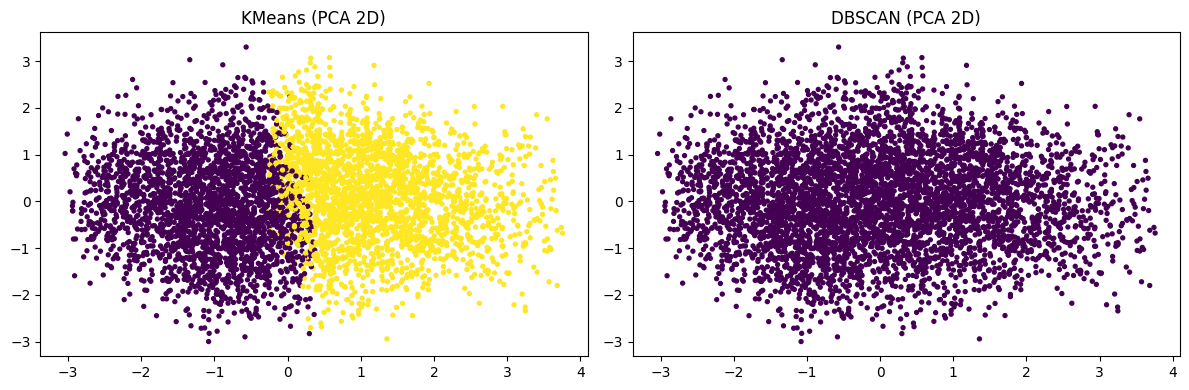

Distribución KMeans:
 0    2616
1    2384
Name: count, dtype: int64

Distribución DBSCAN (-1 = ruido):
 0    5000
Name: count, dtype: int64


In [41]:
# Clustering 

feat_clu = ['age','weight','height','sleep','bmi']
Z = StandardScaler().fit_transform(df_pp[feat_clu].values)

# KMeans
k = 2
km = KMeans(n_clusters=k, n_init=10, random_state=42)
labels_km = km.fit_predict(Z)

# DBSCAN (ajusta eps/min_samples a tu dataset)
db = DBSCAN(eps=1.5, min_samples=20)
labels_db = db.fit_predict(Z)

# Visualización PCA
pca = PCA(n_components=2, random_state=42)
comp = pca.fit_transform(Z)

fig, ax = plt.subplots(1,2, figsize=(12,4))
ax[0].scatter(comp[:,0], comp[:,1], c=labels_km, s=8)
ax[0].set_title("KMeans (PCA 2D)")
ax[1].scatter(comp[:,0], comp[:,1], c=labels_db, s=8)
ax[1].set_title("DBSCAN (PCA 2D)")
plt.tight_layout(); plt.show()

print("Distribución KMeans:\n", pd.Series(labels_km).value_counts().sort_index())
print("\nDistribución DBSCAN (-1 = ruido):\n", pd.Series(labels_db).value_counts().sort_index())


Anomalías detectadas: 150


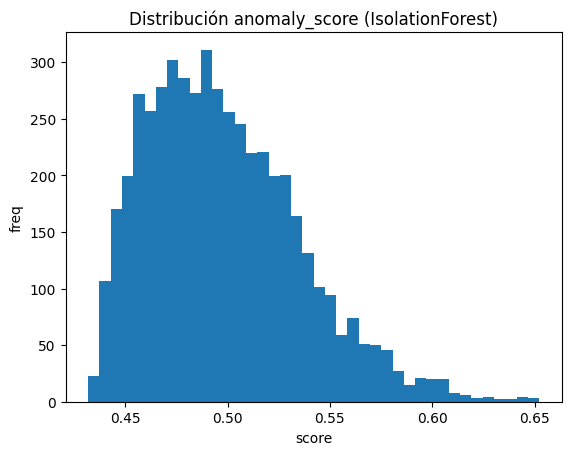

,age,weight,height,exercise,sleep,sugar_intake,smoking,alcohol,married,profession,bmi,health_risk,anomaly,anomaly_score
3938,20,108,147,medium,4.7,medium,yes,no,no,doctor,50.0,high,1,0.652191
172,18,103,147,high,9.8,low,no,no,yes,driver,47.7,low,1,0.650210
4912,18,108,146,none,8.6,medium,no,no,yes,engineer,50.7,high,1,0.647554
368,79,109,148,none,4.8,low,no,no,yes,farmer,49.8,high,1,0.646337
4998,34,109,148,medium,9.9,medium,no,no,yes,doctor,49.8,low,1,0.646123
4501,78,107,148,medium,4.4,medium,yes,no,yes,artist,48.8,high,1,0.642093
3000,18,103,148,medium,4.1,medium,yes,no,yes,doctor,47.0,high,1,0.642000
2094,23,103,147,low,10.0,low,no,no,yes,office_worker,47.7,high,1,0.640146
1860,57,106,146,high,9.8,medium,no,no,no,office_worker,49.7,high,1,0.635734
3244,62,106,146,medium,9.7,low,no,no,no,artist,49.7,high,1,0.633787


In [42]:
# Anomalías Isolation Forest

Xa = df_pp[feat_clu].values
Za = StandardScaler().fit_transform(Xa)

iso = IsolationForest(n_estimators=300, contamination=0.03, random_state=42)
lab = iso.fit_predict(Za)
scores = -iso.score_samples(Za)

anom_df = df_pp.copy()
anom_df["anomaly"] = (lab == -1).astype(int)
anom_df["anomaly_score"] = scores

n_anom = int((anom_df["anomaly"] == 1).sum())
print("Anomalías detectadas:", n_anom)

plt.hist(scores, bins=40)
plt.title("Distribución anomaly_score (IsolationForest)")
plt.xlabel("score"); plt.ylabel("freq")
plt.show()

display(anom_df.sort_values("anomaly_score", ascending=False).head(20))


In [43]:
# Fairness para variables sensibles


sensitive = "age"
target = "target"  # creado en el bloque de clasificación

df_fair = df_model[[sensitive, target]].dropna().copy()
df_fair[target] = df_fair[target].astype(int)

grp = df_fair.groupby(sensitive)[target].agg(["mean","count"]).rename(columns={"mean":"positive_rate","count":"n"})
display(grp.sort_values("positive_rate", ascending=False).head(20))

# Disparate Impact (grupo de referencia: menor tasa positiva)
if not grp.empty and grp["positive_rate"].min() > 0:
    ref_group = grp["positive_rate"].idxmin()
    ref_rate = grp.loc[ref_group, "positive_rate"]
    grp["disparate_impact"] = grp["positive_rate"] / ref_rate
    print(f"Grupo de referencia: {ref_group} (tasa={ref_rate:.3f}) — DI ideal≈1; >1.25 puede sugerir sesgo.")
    display(grp.sort_values("disparate_impact", ascending=False).head(20))
else:
    print("No se puede calcular disparate impact (tasa de referencia = 0 o sin datos).")


,positive_rate,n
age,,
55,0.972973,74
78,0.961039,77
76,0.949367,79
67,0.942857,70
65,0.936508,63
73,0.932432,74
69,0.931507,73
60,0.931034,58
51,0.930233,86


Grupo de referencia: 20 (tasa=0.383) — DI ideal≈1; >1.25 puede sugerir sesgo.


,positive_rate,n,disparate_impact
age,,,
55,0.972973,74,2.542284
78,0.961039,77,2.511102
76,0.949367,79,2.480604
67,0.942857,70,2.463594
65,0.936508,63,2.447005
73,0.932432,74,2.436356
69,0.931507,73,2.433937
60,0.931034,58,2.432703
51,0.930233,86,2.430608


15:39:23 - cmdstanpy - INFO - Chain [1] start processing
15:39:23 - cmdstanpy - INFO - Chain [1] done processing


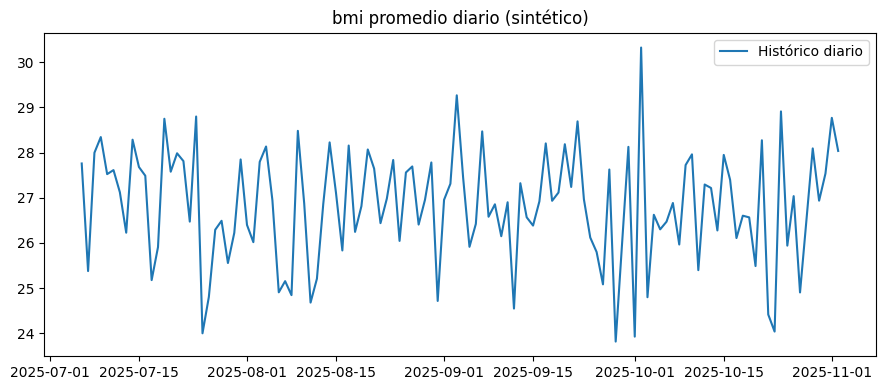

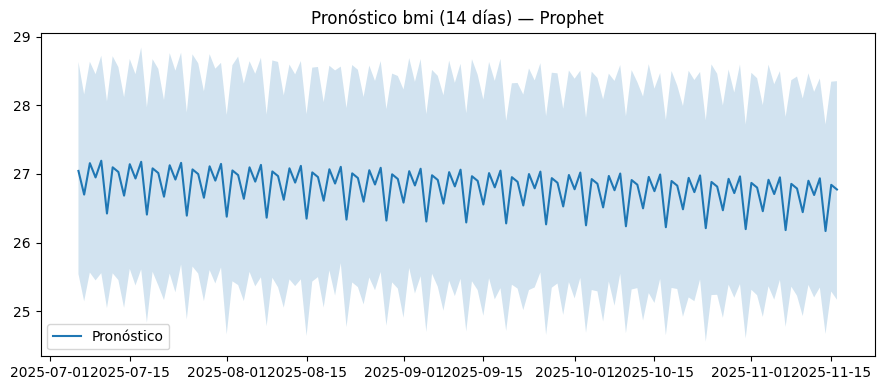

In [45]:
# Prophet sintético: 

# Sólo si deseas demostrar Prophet con serie sintética (p.ej., promedio diario de BMI)
import datetime as dt
try:
    from prophet import Prophet
    HAS_PROPHET = True
except Exception:
    HAS_PROPHET = False
    print("Prophet no está instalado. Instálalo con: pip install prophet")

if HAS_PROPHET:
    metric_col = "bmi"   # puedes usar 'sleep'
    N_DAYS = 120

    rng_dates = pd.date_range(end=dt.date.today(), periods=N_DAYS, freq="D")
    tmp = df_pp.sample(frac=1.0, random_state=42).reset_index(drop=True)
    tmp["ds"] = np.random.choice(rng_dates, size=len(tmp))
    daily = tmp.groupby("ds")[metric_col].mean().reset_index().rename(columns={metric_col:"y"})

    m = Prophet(seasonality_mode="additive")
    m.fit(daily)
    future = m.make_future_dataframe(periods=14)
    forecast = m.predict(future)

    plt.figure(figsize=(9,4))
    plt.plot(daily["ds"], daily["y"], label="Histórico diario")
    plt.title(f"{metric_col} promedio diario (sintético)")
    plt.legend(); plt.tight_layout(); plt.show()

    plt.figure(figsize=(9,4))
    plt.plot(forecast["ds"], forecast["yhat"], label="Pronóstico")
    plt.fill_between(forecast["ds"], forecast["yhat_lower"], forecast["yhat_upper"], alpha=0.2)
    plt.title(f"Pronóstico {metric_col} (14 días) — Prophet")
    plt.legend(); plt.tight_layout(); plt.show()


In [47]:
# Reporte automático


hallazgos = []

# Clusters
try:
    n_km = pd.Series(labels_km).nunique()
    hallazgos.append(f"Se detectaron {n_km} clusters (KMeans).")
except Exception:
    pass

# DBSCAN
try:
    n_db = pd.Series(labels_db).nunique()
    ruido = int((pd.Series(labels_db) == -1).sum())
    hallazgos.append(f"DBSCAN generó {n_db} grupos (ruido={ruido}).")
except Exception:
    pass

# Anomalías
try:
    hallazgos.append(f"Se detectaron {n_anom} registros anómalos (IsolationForest).")
except Exception:
    pass

# Clasificador
try:
    auc_val = roc_auc_score(y_test, y_prob)
    hallazgos.append(f"Clasificador {model_name} con ROC-AUC={auc_val:.3f}.")
except Exception:
    pass

# Fairness
try:
    if 'disparate_impact' in grp.columns:
        peor = grp['disparate_impact'].idxmax()
        hallazgos.append(f"Fairness: '{peor}' presenta mayor disparate impact vs. grupo de referencia.")
except Exception:
    pass

# Prophet (si se ejecutó)
try:
    last_obs = daily.sort_values("ds").iloc[-1]["y"]
    last_fore = forecast.sort_values("ds").iloc[-1]["yhat"]
    delta = last_fore - last_obs
    tendencia = "al alza" if delta>0 else "a la baja" if delta<0 else "estable"
    hallazgos.append(f"Prophet: {metric_col} proyecta tendencia {tendencia} (Δ {delta:.2f}).")
except Exception:
    pass

if not hallazgos:
    hallazgos = ["Pipeline ejecutado. Sin hallazgos automáticos destacados."]

reporte_md = "# Resumen de Auditoría Inteligente\n\n" + "\n".join([f"- {h}" for h in hallazgos])
print(reporte_md)

# (Opcional) guardar en archivo
OUT = "reporte/reporte_auditoria.md"
with open(OUT, "w", encoding="utf-8") as f:
    f.write(reporte_md)
OUT


# Resumen de Auditoría Inteligente

- Se detectaron 2 clusters (KMeans).
- DBSCAN generó 1 grupos (ruido=0).
- Se detectaron 150 registros anómalos (IsolationForest).
- Clasificador CatBoost con ROC-AUC=1.000.
- Fairness: '55' presenta mayor disparate impact vs. grupo de referencia.
- Prophet: bmi proyecta tendencia a la baja (Δ -1.26).


'reporte/reporte_auditoria.md'